In [3]:
%reload_ext dotenv
%dotenv

In [ ]:
# Alternative: Load .env manually if magic command doesn't work
from dotenv import load_dotenv
import os

# Force reload the .env file
load_dotenv('.env', override=True)

print("DATABRICKS_HOST:", os.getenv("DATABRICKS_HOST"))
print("MLFLOW_TRACKING_URI:", os.getenv("MLFLOW_TRACKING_URI"))
print("MLFLOW_EXPERIMENT_ID:", os.getenv("MLFLOW_EXPERIMENT_ID"))
print("MLFLOW_REGISTRY_URI:", os.getenv("MLFLOW_REGISTRY_URI"))
print("DATABRICKS_TOKEN:", os.getenv("DATABRICKS_TOKEN"))


In [ ]:
%pip install -U mlflow openai

In [5]:
# Verify OpenAI API key is loaded
import os

openai_key = os.getenv("OPENAI_API_KEY")
if openai_key:
    print(f"✓ OPENAI_API_KEY is set (starts with: {openai_key[:10]}...)")
else:
    print("✗ OPENAI_API_KEY is NOT set!")
    print("\nPlease add to your .env file:")
    print("OPENAI_API_KEY=sk-proj-your-actual-key-here")
    print("\nThen reload the .env file by running cell 1 again.")

✓ OPENAI_API_KEY is set (starts with: sk-proj-BH...)


# MLFlow OpenAI Autologging

In [25]:
# Adding MLflow's OpenAI autologging
import mlflow

mlflow.openai.autolog()

In [26]:
from openai import OpenAI

# Ensure that the OPENAI_API_KEY environment variable is set
client = OpenAI()

## OpenAI Send messages

In [27]:

messages = [
  {
    "role": "system", 
    "content": "You are a helpful assistant."
  },
  {
    "role": "user",
    "content": "Say hello Juan, Kirti, Julian and Julian! MLFlow Autologging in Databricks."
  }
]

client.chat.completions.create(model="gpt-4o-mini", messages=messages)

ChatCompletion(id='chatcmpl-CZjRkKNW3Hh6Ukjq5Ynb4EyyIz9qv', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content="Hello Juan, Kirti, Julian, and Julian! \n\nIt sounds like you're interested in MLflow autologging in Databricks. MLflow is a powerful platform for managing the machine learning lifecycle, and autologging simplifies the process by automatically logging parameters, metrics, and artifacts from models when you train them.\n\nIn Databricks, you can enable autologging for various libraries, such as TensorFlow, PyTorch, Keras, and Scikit-learn, among others. Here’s a quick overview of how to enable MLflow autologging in Databricks:\n\n1. **Import MLflow**: First, you need to import the MLflow library in your Databricks notebook.\n\n   ```python\n   import mlflow\n   import mlflow.sklearn\n   ```\n\n2. **Enable Autologging**: You can enable autologging for the library you are using. For example, for Scikit-learn, use:\n\n   ```python\n

# Databricks Experiment

In [6]:
import mlflow
import mlflow.sklearn
import pandas as pd
import matplotlib.pyplot as plt

from numpy import savetxt

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [7]:
mlflow.set_tracking_uri("databricks")
mlflow.set_experiment("/Users/vincentschaik@outlook.com/MyExperiment")  

<Experiment: artifact_location='dbfs:/databricks/mlflow-tracking/4123135242913647', creation_time=1762483453685, experiment_id='4123135242913647', last_update_time=1762484867112, lifecycle_stage='active', name='/Users/vincentschaik@outlook.com/MyExperiment', tags={'mlflow.experiment.sourceName': '/Users/vincentschaik@outlook.com/MyExperiment',
 'mlflow.experimentKind': 'custom_model_development',
 'mlflow.experimentType': 'MLFLOW_EXPERIMENT',
 'mlflow.ownerEmail': 'vincentschaik@outlook.com',
 'mlflow.ownerId': '72002788279252'}>

## MLflow Autologging of Scikit-learn Model Training  

In [9]:
db = load_diabetes()
X = db.data
y = db.target
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [10]:
# Enable autolog()
mlflow.sklearn.autolog()

# With autolog() enabled, a logged model is automatically created under the experiment
# All parameters and metrics are automatically logged to both the model and run
with mlflow.start_run():
  
  # Set the model parameters. 
  n_estimators = 100
  max_depth = 6
  max_features = 3
  
  # Create and train model.
  rf = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, max_features = max_features)
  rf.fit(X_train, y_train)
  
  # Use the model to make predictions on the test dataset.
  predictions = rf.predict(X_test)

🏃 View run popular-ram-756 at: https://dbc-4a268935-2edb.cloud.databricks.com/ml/experiments/4123135242913647/runs/334e0099c7a94cbca15bc2caa1c85ae5
🧪 View experiment at: https://dbc-4a268935-2edb.cloud.databricks.com/ml/experiments/4123135242913647


## MLflow Autologging of XGBoost Model Training  

In [ ]:
%pip install xgboost

In [11]:
import mlflow

mlflow.xgboost.autolog()

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
import sys
from glob import glob


from datetime import timedelta
from datetime import datetime
import matplotlib.pyplot as plt
#import mplfinance as mpf
import seaborn as sns
import yfinance as yf


# Add the src directory to the path
src_dir = os.getenv('SRC_DIR')
if src_dir is None:
	# Fallback: assume notebooks folder is one level below project root
	project_root = os.path.dirname(os.getcwd())
	src_dir = os.path.join(project_root, 'src')
print(f"Adding to path: {src_dir}")
sys.path.append(src_dir)

from utils.logger import get_logger
_logs = get_logger(__name__)

Adding to path: ../src/


# Repeating BTC Price Prediction with Autologging

In [13]:
import hashlib

# Load data
# Define ordered column names to enforce consistent schema (overrides original file header)
columns = [
    'Date', 
    'Close',          
    'Open', 
    'High',                
    'Low', 
    'Volume'
]

btc_file = os.getenv("BTC_DATA")

# Read the raw CSV:
# - header=0 reads the first line (original names) but they are replaced by 'columns'
# - names=columns ensures consistent snake_case naming initialize above
btc_dt = (pd.read_csv(btc_file, header = 0, names = columns))

# Save processed data to a new CSV folder and appeand file name with hash value
    
# Create a hash of the DataFrame
df_hash = hashlib.md5(btc_dt.to_csv(index=False).encode()).hexdigest()
processed_btc_file = os.getenv("PROCESSED_BTC_DATA").replace(".csv", f"_{df_hash}.csv")
btc_dt.to_csv(processed_btc_file, index=False)

# Log the completion of data loading and feature creation and record file name
_logs.info("Loaded BTC-USD dataset into DataFrame.")
_logs.info(f"Processed BTC-USD dataset saved to: {processed_btc_file}")

2025-11-08 14:57:08,527, 2713969401.py, 29, INFO, Loaded BTC-USD dataset into DataFrame.
2025-11-08 14:57:08,534, 2713969401.py, 30, INFO, Processed BTC-USD dataset saved to: ../data/processed/btc_processed_8d4c513d70341c9eb8c09d7c4aa06be1.csv
2025-11-08 14:57:08,534, 2713969401.py, 30, INFO, Processed BTC-USD dataset saved to: ../data/processed/btc_processed_8d4c513d70341c9eb8c09d7c4aa06be1.csv


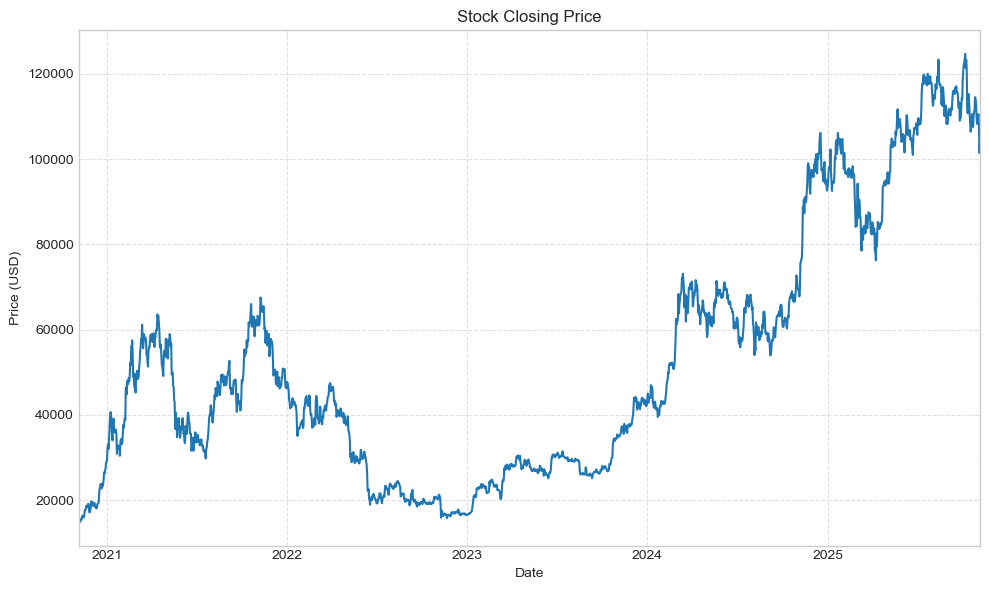

In [14]:
# Style sheet
plt.style.use('seaborn-v0_8-whitegrid')


# Ensure Date is datetime
btc_dt['Date'] = pd.to_datetime(btc_dt['Date'])
# Set date as index
btc_dt = btc_dt.set_index('Date')


btc_dt['Close'].plot(figsize=(10, 6), title='Stock Closing Price')

plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

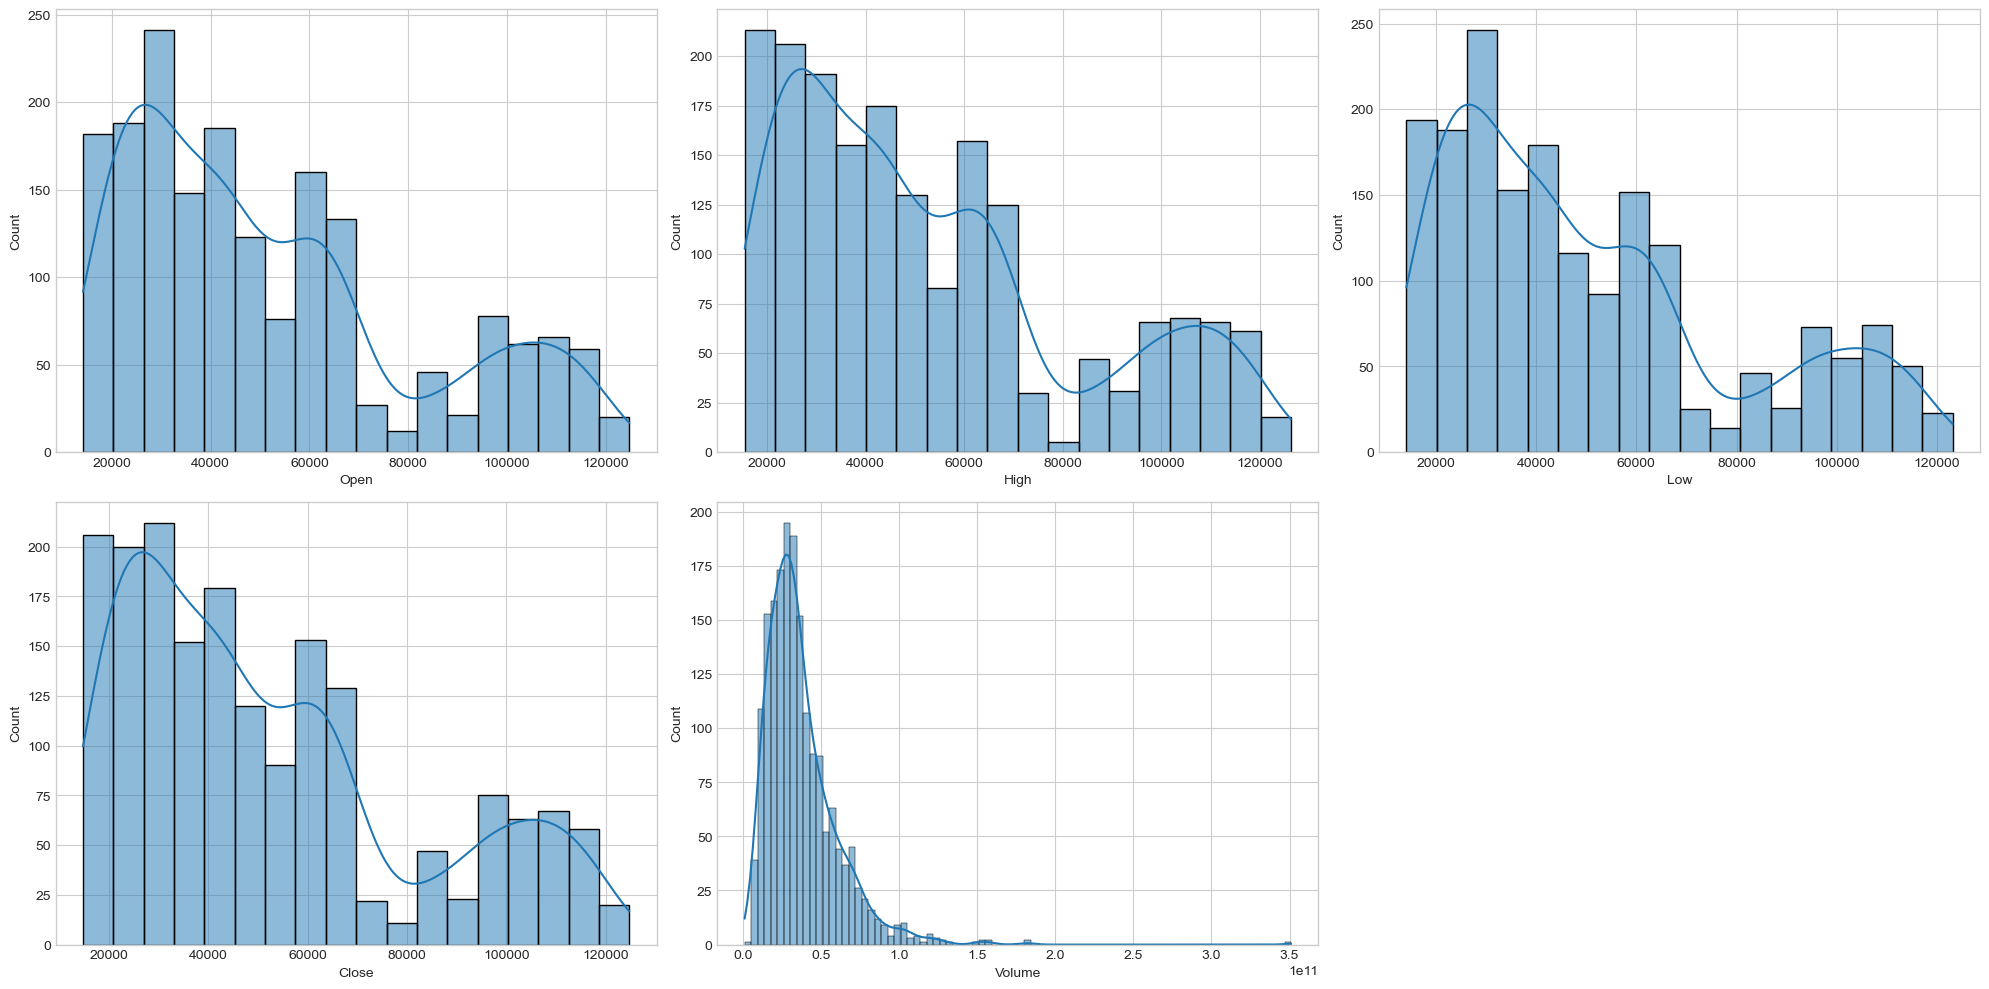

In [15]:
# Distribution Plots
features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.figure(figsize=(20,10))

for i, col in enumerate(features):
    plt.subplot(2, 3, i+1)
    sb.histplot(btc_dt[col], kde=True)  # replaces distplot

plt.tight_layout()
plt.show()

In [16]:
# Extract year, month, day from the DatetimeIndex
btc_dt['Year'] = btc_dt.index.year
btc_dt['Month'] = btc_dt.index.month
btc_dt['Day'] = btc_dt.index.day

btc_dt.head()

,Close,Open,High,Low,Volume,Year,Month,Day
Date,,,,,,,,
2020-11-05,15608.21,14165.86,15775.00,14115.00,40856321439,2020,11,5
2020-11-06,15599.95,15608.06,15977.67,15190.36,39837841971,2020,11,6
2020-11-07,14834.09,15599.95,15779.24,14310.00,35024953706,2020,11,7
2020-11-08,15482.90,14834.09,15666.00,14721.90,26632075029,2020,11,8
2020-11-09,15342.25,15482.89,15856.90,14817.14,34149115566,2020,11,9


In [17]:
import numpy as np

btc_dt['is_quarter_end'] = np.where(btc_dt['Month']%3==0,1,0)
btc_dt.head()

,Close,Open,High,Low,Volume,Year,Month,Day,is_quarter_end
Date,,,,,,,,,
2020-11-05,15608.21,14165.86,15775.00,14115.00,40856321439,2020,11,5,0
2020-11-06,15599.95,15608.06,15977.67,15190.36,39837841971,2020,11,6,0
2020-11-07,14834.09,15599.95,15779.24,14310.00,35024953706,2020,11,7,0
2020-11-08,15482.90,14834.09,15666.00,14721.90,26632075029,2020,11,8,0
2020-11-09,15342.25,15482.89,15856.90,14817.14,34149115566,2020,11,9,0


In [18]:
# Signal whether to buy or not 
btc_dt['Open-Close']  = btc_dt['Open'] - btc_dt['Close']
btc_dt['Low-High']  = btc_dt['Low'] - btc_dt['High']

# Create target column with 1% price sensitivity
btc_dt['Target'] = np.where(btc_dt['Close'].shift(-1) > btc_dt['Close'] * 1.01, 1, 0)

print(f"Price Sensitivity: 1% (0.01)")
print(f"Bullish signals (1): {btc_dt['Target'].sum()} ({btc_dt['Target'].sum()/len(btc_dt)*100:.2f}%)")
print(f"Bearish signals (0): {(btc_dt['Target']==0).sum()} ({(btc_dt['Target']==0).sum()/len(btc_dt)*100:.2f}%)")


Price Sensitivity: 1% (0.01)
Bullish signals (1): 593 (32.46%)
Bearish signals (0): 1234 (67.54%)


In [19]:
# Technical Analysis Features

# Moving Averages
btc_dt['MA_7'] = btc_dt['Close'].rolling(window=7).mean()
btc_dt['MA_14'] = btc_dt['Close'].rolling(window=14).mean()
btc_dt['MA_21'] = btc_dt['Close'].rolling(window=21).mean()
btc_dt['MA_50'] = btc_dt['Close'].rolling(window=50).mean()
btc_dt['MA_200'] = btc_dt['Close'].rolling(window=200).mean()

# Exponential Moving Averages
btc_dt['EMA_12'] = btc_dt['Close'].ewm(span=12, adjust=False).mean()
btc_dt['EMA_26'] = btc_dt['Close'].ewm(span=26, adjust=False).mean()

# MACD (Moving Average Convergence Divergence)
btc_dt['MACD'] = btc_dt['EMA_12'] - btc_dt['EMA_26']
btc_dt['MACD_Signal'] = btc_dt['MACD'].ewm(span=9, adjust=False).mean()
btc_dt['MACD_Histogram'] = btc_dt['MACD'] - btc_dt['MACD_Signal']

# Relative Strength Index (RSI)
delta = btc_dt['Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
btc_dt['RSI'] = 100 - (100 / (1 + rs))

# Bollinger Bands
btc_dt['BB_Middle'] = btc_dt['Close'].rolling(window=20).mean()
bb_std = btc_dt['Close'].rolling(window=20).std()
btc_dt['BB_Upper'] = btc_dt['BB_Middle'] + (bb_std * 2)
btc_dt['BB_Lower'] = btc_dt['BB_Middle'] - (bb_std * 2)
btc_dt['BB_Width'] = btc_dt['BB_Upper'] - btc_dt['BB_Lower']

# Price Rate of Change (ROC)
btc_dt['ROC'] = ((btc_dt['Close'] - btc_dt['Close'].shift(10)) / btc_dt['Close'].shift(10)) * 100

# Average True Range (ATR) - Volatility Indicator
high_low = btc_dt['High'] - btc_dt['Low']
high_close = np.abs(btc_dt['High'] - btc_dt['Close'].shift())
low_close = np.abs(btc_dt['Low'] - btc_dt['Close'].shift())
true_range = pd.concat([high_low, high_close, low_close], axis=1).max(axis=1)
btc_dt['ATR'] = true_range.rolling(window=14).mean()

# Stochastic Oscillator
low_14 = btc_dt['Low'].rolling(window=14).min()
high_14 = btc_dt['High'].rolling(window=14).max()
btc_dt['Stochastic_%K'] = 100 * ((btc_dt['Close'] - low_14) / (high_14 - low_14))
btc_dt['Stochastic_%D'] = btc_dt['Stochastic_%K'].rolling(window=3).mean()

# On-Balance Volume (OBV)
btc_dt['OBV'] = (np.sign(btc_dt['Close'].diff()) * btc_dt['Volume']).fillna(0).cumsum()

# Volume Rate of Change
btc_dt['Volume_ROC'] = ((btc_dt['Volume'] - btc_dt['Volume'].shift(5)) / btc_dt['Volume'].shift(5)) * 100

# Price momentum
btc_dt['Momentum'] = btc_dt['Close'] - btc_dt['Close'].shift(4)

# Percentage change features
btc_dt['Daily_Return'] = btc_dt['Close'].pct_change() * 100
btc_dt['Volatility_10'] = btc_dt['Daily_Return'].rolling(window=10).std()
btc_dt['Volatility_30'] = btc_dt['Daily_Return'].rolling(window=30).std()

_logs.info(f"Technical analysis features created. Dataset now has {btc_dt.shape[1]} features.")

2025-11-08 14:57:29,212, 4133966.py, 63, INFO, Technical analysis features created. Dataset now has 37 features.


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import warnings

warnings.filterwarnings('ignore')

# Prepare data - drop rows with NaN values and select features
ml_data = btc_dt.dropna().copy()

# Select features for modeling (excluding target and date-related features)
feature_cols = ['Open', 'High', 'Low', 'Close', 'Volume', 
                'Open-Close', 'Low-High',
                'MA_7', 'MA_14', 'MA_21', 'MA_50', 'MA_200',
                'EMA_12', 'EMA_26', 'MACD', 'MACD_Signal', 'MACD_Histogram',
                'RSI', 'BB_Middle', 'BB_Upper', 'BB_Lower', 'BB_Width',
                'ROC', 'ATR', 'Stochastic_%K', 'Stochastic_%D',
                'OBV', 'Volume_ROC', 'Momentum', 'Daily_Return',
                'Volatility_10', 'Volatility_30']

X = ml_data[feature_cols]
y = ml_data['Target']

# Split data into train and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

_logs.info(f"Training set size: {X_train.shape[0]}, Test set size: {X_test.shape[0]}")

# 1. Logistic Regression
_logs.info("Training Logistic Regression model...")
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)
lr_prob = lr_model.predict_proba(X_test_scaled)[:, 1]

print("=" * 60)
print("LOGISTIC REGRESSION RESULTS")
print("=" * 60)
print(f"Accuracy: {accuracy_score(y_test, lr_pred):.4f}")
print(f"ROC-AUC Score: {roc_auc_score(y_test, lr_prob):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, lr_pred))

# 2. Random Forest
_logs.info("Training Random Forest model...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10, min_samples_split=5)
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)
rf_prob = rf_model.predict_proba(X_test_scaled)[:, 1]

print("=" * 60)
print("RANDOM FOREST RESULTS")
print("=" * 60)
print(f"Accuracy: {accuracy_score(y_test, rf_pred):.4f}")
print(f"ROC-AUC Score: {roc_auc_score(y_test, rf_prob):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, rf_pred))

# 3. XGBoost
_logs.info("Training XGBoost model...")
xgb_model = XGBClassifier(n_estimators=100, random_state=42, max_depth=5, learning_rate=0.1, eval_metric='logloss')
xgb_model.fit(X_train_scaled, y_train)
xgb_pred = xgb_model.predict(X_test_scaled)
xgb_prob = xgb_model.predict_proba(X_test_scaled)[:, 1]

print("=" * 60)
print("XGBOOST RESULTS")
print("=" * 60)
print(f"Accuracy: {accuracy_score(y_test, xgb_pred):.4f}")
print(f"ROC-AUC Score: {roc_auc_score(y_test, xgb_prob):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, xgb_pred))


_logs.info("Model training completed successfully.")


2025-11-08 14:57:36,428, 2794898342.py, 35, INFO, Training set size: 1302, Test set size: 326
2025-11-08 14:57:36,430, 2794898342.py, 38, INFO, Training Logistic Regression model...
2025-11-08 14:57:36,430, 2794898342.py, 38, INFO, Training Logistic Regression model...
2025/11/08 14:57:36 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '735ebd26b07a42d99f6eb6a2676e5f4d', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2025/11/08 14:57:36 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '735ebd26b07a42d99f6eb6a2676e5f4d', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2025/11/08 14:57:36 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'Series' object has no attribute 'flatten'
2025/11/08 14:57:36 WARNING mlflow.sklearn: Failed

🏃 View run nosy-fawn-995 at: https://dbc-4a268935-2edb.cloud.databricks.com/ml/experiments/4123135242913647/runs/735ebd26b07a42d99f6eb6a2676e5f4d
🧪 View experiment at: https://dbc-4a268935-2edb.cloud.databricks.com/ml/experiments/4123135242913647
LOGISTIC REGRESSION RESULTS
LOGISTIC REGRESSION RESULTS


2025-11-08 14:57:45,040, 2794898342.py, 53, INFO, Training Random Forest model...
2025/11/08 14:57:45 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '35fb3e472fe94c3e8349b485614675b9', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2025/11/08 14:57:45 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'Series' object has no attribute 'flatten'
2025/11/08 14:57:45 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '35fb3e472fe94c3e8349b485614675b9', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2025/11/08 14:57:45 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'Series' object has no attribute 'flatten'


Accuracy: 0.6963
ROC-AUC Score: 0.5764

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.89      0.81       238
           1       0.37      0.18      0.24        88

    accuracy                           0.70       326
   macro avg       0.56      0.53      0.53       326
weighted avg       0.64      0.70      0.66       326

🏃 View run placid-turtle-191 at: https://dbc-4a268935-2edb.cloud.databricks.com/ml/experiments/4123135242913647/runs/35fb3e472fe94c3e8349b485614675b9
🧪 View experiment at: https://dbc-4a268935-2edb.cloud.databricks.com/ml/experiments/4123135242913647
🏃 View run placid-turtle-191 at: https://dbc-4a268935-2edb.cloud.databricks.com/ml/experiments/4123135242913647/runs/35fb3e472fe94c3e8349b485614675b9
🧪 View experiment at: https://dbc-4a268935-2edb.cloud.databricks.com/ml/experiments/4123135242913647
RANDOM FOREST RESULTS
RANDOM FOREST RESULTS


2025-11-08 14:57:52,694, 2794898342.py, 68, INFO, Training XGBoost model...
2025/11/08 14:57:52 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '54fd6606f4b34798b12ab0dab4a66298', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current xgboost workflow
2025/11/08 14:57:52 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '54fd6606f4b34798b12ab0dab4a66298', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current xgboost workflow


Accuracy: 0.5184
ROC-AUC Score: 0.5034

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.52      0.61       238
           1       0.29      0.52      0.37        88

    accuracy                           0.52       326
   macro avg       0.52      0.52      0.49       326
weighted avg       0.62      0.52      0.55       326



2025/11/08 14:57:54 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


🏃 View run industrious-croc-782 at: https://dbc-4a268935-2edb.cloud.databricks.com/ml/experiments/4123135242913647/runs/54fd6606f4b34798b12ab0dab4a66298
🧪 View experiment at: https://dbc-4a268935-2edb.cloud.databricks.com/ml/experiments/4123135242913647
XGBOOST RESULTS
XGBOOST RESULTS


2025-11-08 14:58:00,730, 2794898342.py, 83, INFO, Model training completed successfully.


Accuracy: 0.7178
ROC-AUC Score: 0.5866

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.93      0.83       238
           1       0.43      0.14      0.21        88

    accuracy                           0.72       326
   macro avg       0.59      0.53      0.52       326
weighted avg       0.66      0.72      0.66       326



# Reading Data from Databricks Volumes

Using the **Databricks SDK** access files in Databricks Volumes remotely.

## Three Approaches:

### Option 1: Download & Read
- Use `WorkspaceClient().files.download()` to read the file
- Best for reading existing files from Databricks Volumes

### Option 2: SQL Warehouse Query
- Requires SQL warehouse setup
- Good for querying Delta tables
- More complex for simple CSV reading

### Option 3: Upload Local File First
- Upload your local CSV to Databricks Volume
- Then read it using Option 1

**Important:** 
- `pd.read_csv("/Volumes/...")` only works when running **on a Databricks cluster**
- For local execution, use the Databricks SDK methods below

In [21]:
# Option 1: Read CSV from Databricks Volume using Databricks SDK
from databricks.sdk import WorkspaceClient
import pandas as pd
import io

# Initialize the Databricks client (uses DATABRICKS_HOST and DATABRICKS_TOKEN from environment)
w = WorkspaceClient()

# Path to your file in Databricks Volumes
# Format: /Volumes/<catalog>/<schema>/<volume>/<path-to-file>
volume_path = "/Volumes/workspace/default/crypto/dataset.csv"

try:
    # Download file content from Databricks Volume
    print(f"Attempting to read file from: {volume_path}")
    
    # Read the file from the volume
    file_content = w.files.download(volume_path).contents
    
    # Convert to pandas DataFrame
    df = pd.read_csv(io.BytesIO(file_content.read()))
    
    print(f"✓ Successfully loaded DataFrame from Databricks Volume")
    print(f"Shape: {df.shape}")
    print("\nFirst few rows:")
    print(df.head())
    
except Exception as e:
    print(f"✗ Error loading CSV file: {e}")
    print("\nTroubleshooting:")
    print("  1. Verify the volume path is correct")
    print("  2. Check that DATABRICKS_TOKEN has permissions to read from this volume")
    print("  3. Ensure the file exists at the specified path in Databricks")

Attempting to read file from: /Volumes/workspace/default/crypto/dataset.csv
✓ Successfully loaded DataFrame from Databricks Volume
Shape: (1827, 6)

First few rows:
         date     close      open      high       low       volume
0  2020-11-05  15608.21  14165.86  15775.00  14115.00  40856321439
1  2020-11-06  15599.95  15608.06  15977.67  15190.36  39837841971
2  2020-11-07  14834.09  15599.95  15779.24  14310.00  35024953706
3  2020-11-08  15482.90  14834.09  15666.00  14721.90  26632075029
4  2020-11-09  15342.25  15482.89  15856.90  14817.14  34149115566
✓ Successfully loaded DataFrame from Databricks Volume
Shape: (1827, 6)

First few rows:
         date     close      open      high       low       volume
0  2020-11-05  15608.21  14165.86  15775.00  14115.00  40856321439
1  2020-11-06  15599.95  15608.06  15977.67  15190.36  39837841971
2  2020-11-07  14834.09  15599.95  15779.24  14310.00  35024953706
3  2020-11-08  15482.90  14834.09  15666.00  14721.90  26632075029
4  2020-1

In [ ]:
# Option 2: Read CSV from Databricks Volume using SQL query
# This requires databricks-sql-connector
%pip install databricks-sql-connector

from databricks import sql
import pandas as pd
import os

try:
    # Connect to Databricks SQL Warehouse
    connection = sql.connect(
        server_hostname=os.getenv("DATABRICKS_HOST").replace("https://", ""),
        http_path="/sql/1.0/warehouses/bb99a34de250ce6d",  # Replace with your SQL warehouse HTTP path
        access_token=os.getenv("DATABRICKS_TOKEN")
    )
    
    cursor = connection.cursor()
    
    # Query to read from volume (requires creating a table or using COPY INTO)
    # For now, let's just test the connection
    cursor.execute("select * from `workspace`.`default`.`dataset` limit 10;")
    result = cursor.fetchall()
    print(f"Connected to Databricks as: {result}")

    df = pd.DataFrame(result, columns=[col[0] for col in cursor.description])

    cursor.close()
    connection.close()

    print(df.head())

except Exception as e:
    print(f"Connection error: {e}")
    print("This method requires a SQL Warehouse. Use Option 1 (Databricks SDK) instead.")

In [22]:
from databricks import sql
import os, json, datetime as dt

try:
    connection = sql.connect(
        server_hostname=os.getenv("DATABRICKS_HOST").replace("https://", ""),
        http_path="/sql/1.0/warehouses/bb99a34de250ce6d",  
        access_token=os.getenv("DATABRICKS_TOKEN")
    )

    cursor = connection.cursor()

    event = {
        "ts": dt.datetime.utcnow().isoformat(),
        "user_id": "vincent",
        "event_type": "train_start",
        "source": "vs-code-notebook",
        "payload": {"model":"lstm","window":10}
    }
    cursor.execute("""
    INSERT INTO default.app_events (event_ts,user_id,event_type,source,payload)
    VALUES (current_timestamp(), ?, ?, ?, ?)
    """, (event["user_id"], event["event_type"], event["source"], json.dumps(event["payload"])))

    connection.commit(); cursor.close(); connection.close()

except Exception as e:
    print(f"Connection error: {e}")

In [23]:
from dotenv import load_dotenv
from utils.logger import get_logger

import os

# Force reload the .env file
load_dotenv('.env', override=True)

print("Environment variables check:")
print("=" * 60)
required_vars = {
    "DATABRICKS_HOST": os.getenv("DATABRICKS_HOST"),
    "DATABRICKS_TOKEN": os.getenv("DATABRICKS_TOKEN"),
    "DATABRICKS_WAREHOUSE_PATH": os.getenv("DATABRICKS_WAREHOUSE_PATH"),
    "DB_CATALOG": os.getenv("DB_CATALOG", "default"),
    "DB_SCHEMA": os.getenv("DB_SCHEMA", "default"),
    "DB_EVENTS_TABLE": os.getenv("DB_EVENTS_TABLE", "app_events")
}

all_set = True
for var_name, var_value in required_vars.items():
    if var_value:
        # Mask tokens for security
        if "TOKEN" in var_name:
            display_value = f"{var_value[:10]}..." if len(var_value) > 10 else "***"
        else:
            display_value = var_value
        print(f"{var_name}: {display_value}")
    else:
        print(f"{var_name}: NOT SET")
        all_set = False

print("=" * 60)
if all_set:
    print("✓ All required environment variables are set!")
else:

    print("✗ Some variables are missing. Please check your .env file.")

Environment variables check:
DATABRICKS_HOST: https://dbc-4a268935-2edb.cloud.databricks.com
DATABRICKS_TOKEN: dapi31d12d...
DATABRICKS_WAREHOUSE_PATH: /sql/1.0/warehouses/bb99a34de250ce6d
DB_CATALOG: workspace
DB_SCHEMA: default
DB_EVENTS_TABLE: app_events
✓ All required environment variables are set!


In [24]:
import os
from utils.logger import get_logger
import utils.events as events
from importlib import reload

reload(events)

# Force reload the .env file
load_dotenv('.env', override=True)

# Log event to Databricks using the utility
events.log_event(
    event_type="model_evaluation",
    source="cryptofinance",
    payload={"file": "mlflow_databricks.py", "method": "train_logistic_regression", "model": "logistic_regression"}
)
